####  학습목표
- 시각화 패키지 matplotlib
- 서브 패키지   pyplot
- 고급 패키지   seaborn
- 지도 시각화   folium 
- 현업(BI)      Tableau

In [4]:
import numpy  as np
import pandas as pd 
import matplotlib.pyplot as plt 
import json   as j 

# 
import seaborn as sns 
import folium  as f 

import warnings
warnings.filterwarnings('ignore')

print('numpy   version , ' , np.__version__)
print('pandnas version , ' , pd.__version__)

numpy   version ,  1.24.3
pandnas version ,  1.5.3


In [2]:
%matplotlib inline

# 한글 폰트 문제 해결
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False    
    
import warnings
warnings.filterwarnings(action='ignore')    

plot 유형
- 선, 막대, 박스, 히스토그램 etc...

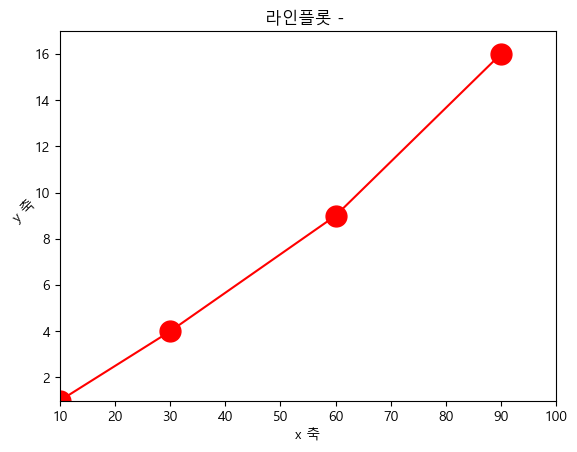

In [25]:
plt.figure()


# plt.plot([1,2,3,4,5,6,7,8,9])
# plt.plot([1,4,9,5,6,7,2,7,9])

plt.plot([10, 30, 60, 90], [1, 4, 9, 16] , 
         color  = 'red' , 
         marker = 'o' , 
         ms     = 15)

plt.title('라인플롯 - ')
plt.xlabel('x 축')
plt.ylabel('y 축' , rotation = 45)
plt.xlim(10, 100)
plt.ylim(1, 17)
plt.show()
plt.close() 

- 시도별전출입인구수.xlsx

In [34]:
popFrm = pd.read_excel('./data/시도별 전출입 인구수.xlsx' , 
                       header = 0)
popFrm.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [31]:
popFrm.columns

Index(['전출지별', '전입지별', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017'],
      dtype='object')

In [35]:
popFrm['전출지별'].unique()

array(['전출지별', '전국', nan, '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시',
       '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도',
       '전라남도', '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [38]:
popFrm.fillna(method = 'ffill' , inplace = True) 

In [39]:
popFrm.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [49]:
print('서울에서 다른지역으로 이동한 데이터만 추출하여 seoulFrm 서브셋을 만들어보자 - ')
print('즉, 서울에서 서울로 이동한 데이터는 제외')
seoulFrm = popFrm[ (popFrm['전출지별'] == '서울특별시') & 
                   (popFrm['전입지별'] != '서울특별시') ]

서울에서 다른지역으로 이동한 데이터만 추출하여 seoulFrm 서브셋을 만들어보자 - 
즉, 서울에서 서울로 이동한 데이터는 제외


In [42]:
popFrm['전출지별'].unique()

array(['전출지별', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [44]:
popFrm['전입지별'].unique()

array(['전입지별', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [50]:
seoulFrm

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,서울특별시,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,서울특별시,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,서울특별시,대구광역시,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,서울특별시,인천광역시,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,서울특별시,광주광역시,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
25,서울특별시,대전광역시,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
26,서울특별시,울산광역시,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
27,서울특별시,세종특별자치시,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
28,서울특별시,경기도,130149,150313,93333,143234,149045,253705,202276,207722,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433
29,서울특별시,강원도,9352,12885,13561,16481,15479,27837,25927,25415,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


In [52]:
print('Q2) 전출지별 열 인덱스를 삭제 - drop ')
seoulFrm.drop('전출지별' , axis = 1 , inplace = True)

Q2) 전출지별 열 인덱스를 삭제 - drop 


In [53]:
seoulFrm

,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,대구광역시,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,인천광역시,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,광주광역시,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
25,대전광역시,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
26,울산광역시,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
27,세종특별자치시,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
28,경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433
29,강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


In [55]:
print('Q3) 전입지별 -> 전입지 변경 - rename') 
seoulFrm.rename({'전입지별' : '전입지'} , axis = 1 , inplace = True)

Q3) 전입지별 -> 전입지 변경 - rename


In [57]:
seoulFrm.columns

Index(['전입지', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017'],
      dtype='object')

In [61]:
print('Q4) 전입지를 인덱스 구성 - ') 
seoulFrm.set_index('전입지' , inplace = True)

Q4) 전입지를 인덱스 구성 - 


In [63]:
seoulFrm.index

Index(['전국', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시',
       '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도',
       '제주특별자치도'],
      dtype='object', name='전입지')

In [68]:
print('경기도로 전입한 인구 데이터 추출 - ')
seoulPop = seoulFrm.loc['경기도' , : ]
print('type   - ' , type(seoulPop))
print('index  - ' , seoulPop.index)
print('values - ' , seoulPop.values)


경기도로 전입한 인구 데이터 추출 - 
type   -  <class 'pandas.core.series.Series'>
index  -  Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017'],
      dtype='object')
values -  [130149 150313 93333 143234 149045 253705 202276 207722 237684 278411
 297539 252073 320174 400875 352238 390265 412535 405220 415174 412933
 473889 384714 428344 502584 542204 599411 520566 495454 407050 471841
 435573 499575 516765 457656 400206 414621 449632 431637 412408 398282
 410735 373771 354135 340801 332785 359337 370760 342433]


서울 -> 경기도 이동한 인구 데이터를 시각화 - 


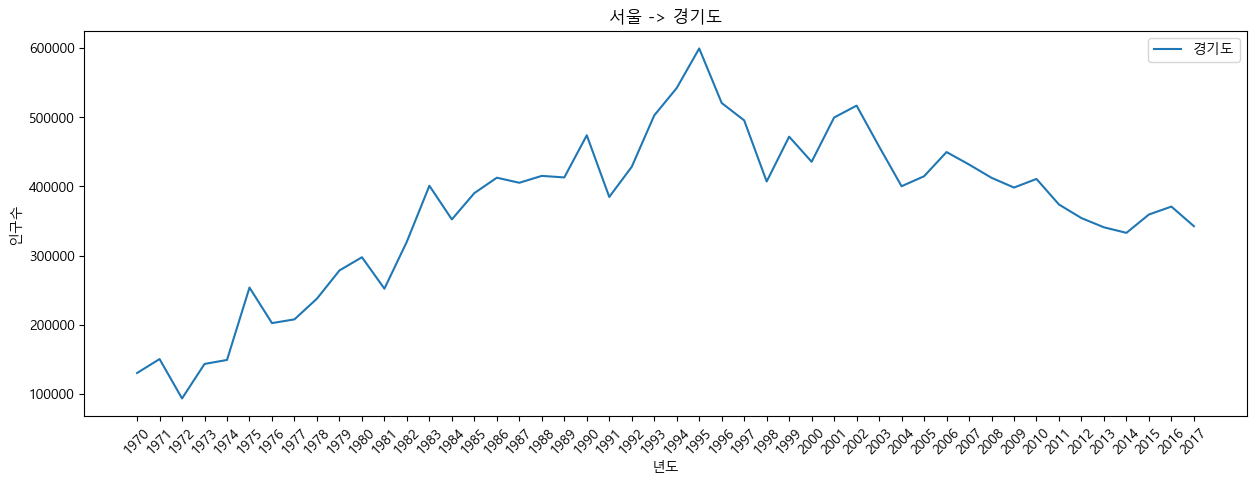

In [81]:
print('서울 -> 경기도 이동한 인구 데이터를 시각화 - ') 
plt.figure(figsize=(15, 5))

plt.plot(seoulPop.index , seoulPop.values , label = '경기도')

plt.title('서울 -> 경기도')
plt.xlabel('년도')
plt.ylabel('인구수')
plt.legend(loc = 'best')
plt.xticks(rotation = 45)
plt.show()
plt.close()

Q4) 충청남도, 경상북도, 전라남도로 이동한 인구 데이터를 시각화 - 


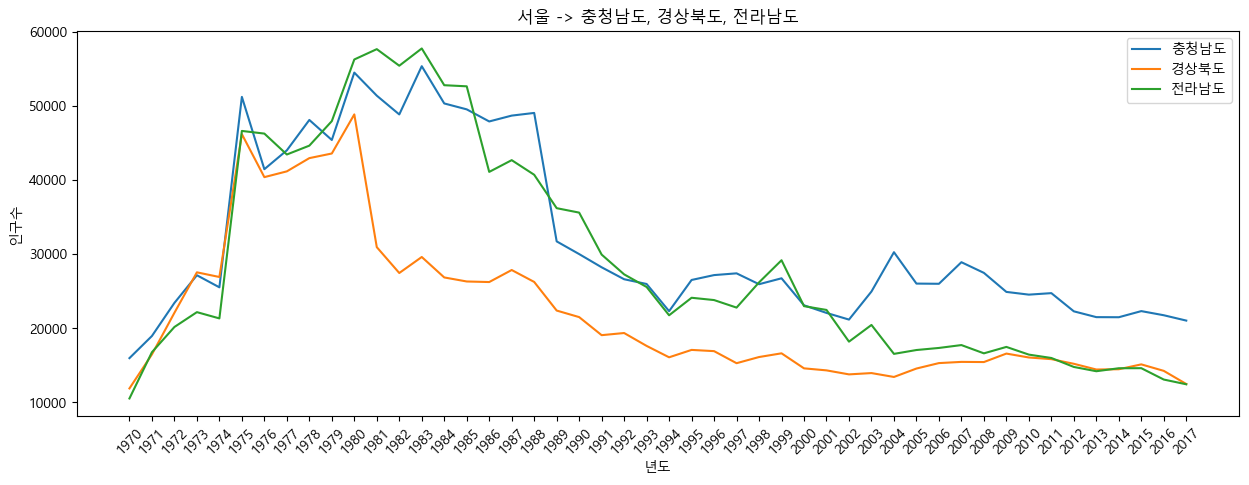

In [86]:
print('Q4) 충청남도, 경상북도, 전라남도로 이동한 인구 데이터를 시각화 - ') 
plt.figure(figsize=(15, 5))

plt.plot(seoulFrm.columns , seoulFrm.loc['충청남도'].values , label = '충청남도')
plt.plot(seoulFrm.columns , seoulFrm.loc['경상북도'].values , label = '경상북도')
plt.plot(seoulFrm.columns , seoulFrm.loc['전라남도'].values , label = '전라남도')

plt.title('서울 -> 충청남도, 경상북도, 전라남도')
plt.xlabel('년도')
plt.ylabel('인구수')
plt.legend(loc = 'best')
plt.xticks(rotation = 45)
plt.show()
plt.close()

- subplot

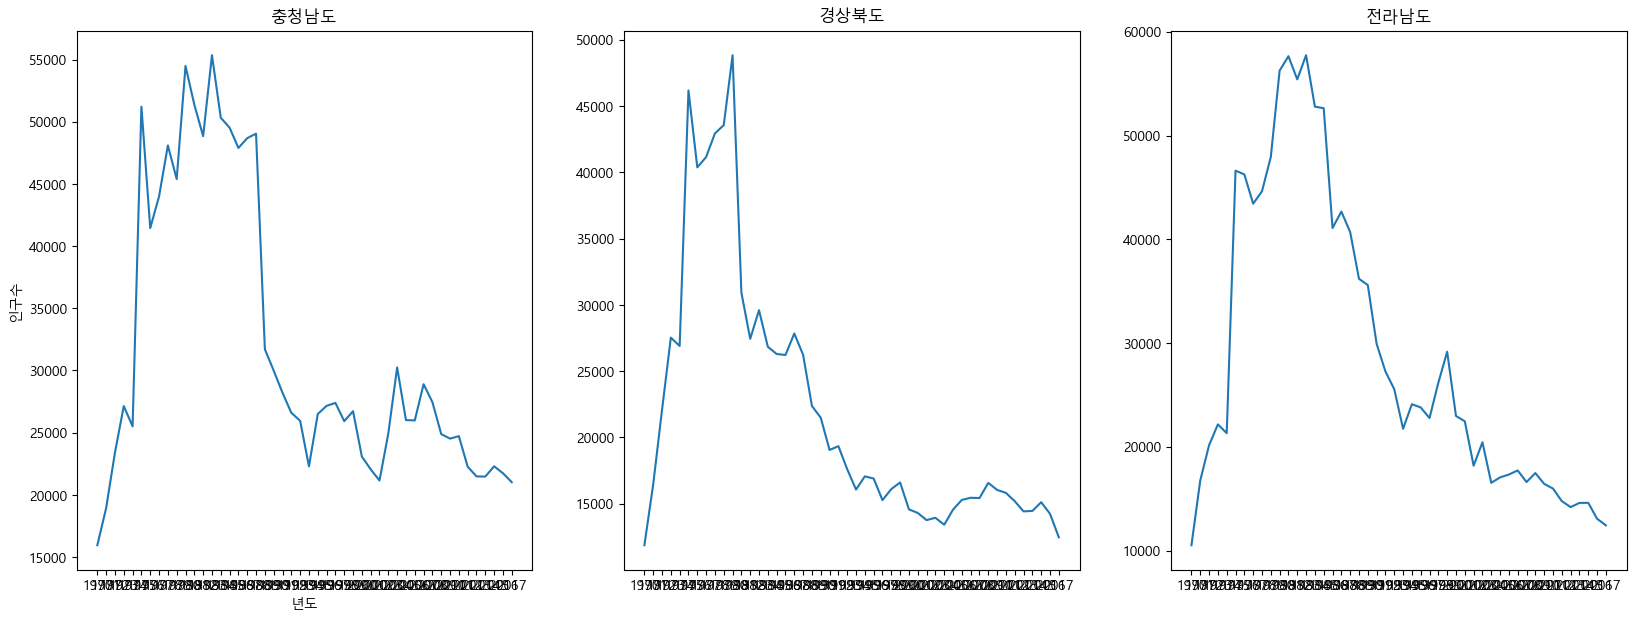

In [97]:
fig = plt.figure(figsize = (20, 7))

area01 = fig.add_subplot(1,3,1)
area01.plot(seoulFrm.columns , seoulFrm.loc['충청남도'].values , label = '충청남도')
area01.set_title('충청남도')
area01.set_xlabel('년도')
area01.set_ylabel('인구수')

area02 = fig.add_subplot(1,3,2)
area02.plot(seoulFrm.columns , seoulFrm.loc['경상북도'].values , label = '경상북도')
area02.set_title('경상북도')

area03 = fig.add_subplot(1,3,3)
area03.plot(seoulFrm.columns , seoulFrm.loc['전라남도'].values , label = '전라남도')
area03.set_title('전라남도')


plt.show()
plt.close()

- bar chart : x축이 범주형(category) 

In [99]:
titanicFrm = sns.load_dataset('titanic') 
titanicFrm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [137]:
print('Q1) 선실등급별 생존자 합을 추출하고 싶다면 - ') 
titanicFrm.groupby('pclass')['survived'].sum().index
# titanicFrm.groupby('pclass')['survived'].sum().values

Q1) 선실등급별 생존자 합을 추출하고 싶다면 - 


Int64Index([1, 2, 3], dtype='int64', name='pclass')

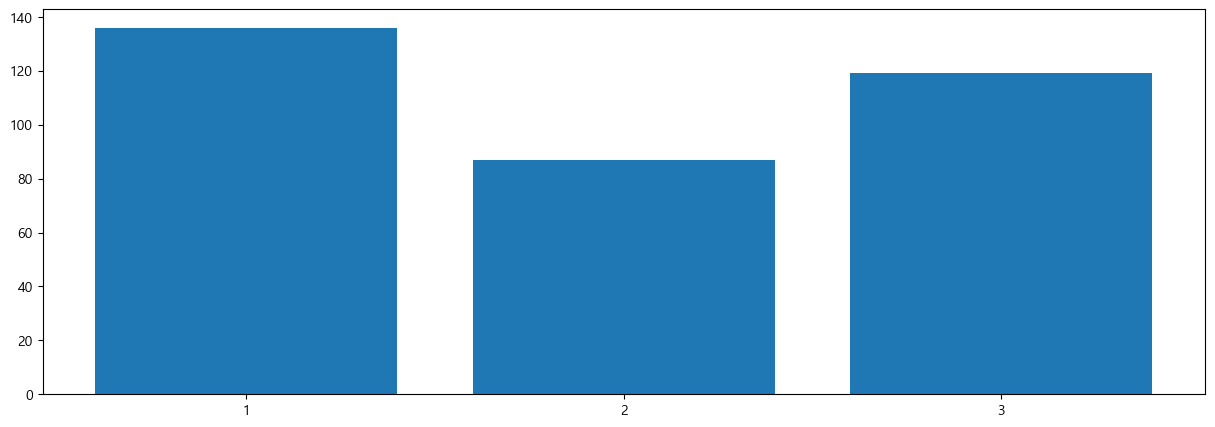

In [115]:
plt.figure(figsize = (15, 5))

plt.bar(titanicFrm.groupby('pclass')['survived'].sum().index , 
        titanicFrm.groupby('pclass')['survived'].sum().values)

plt.xticks(titanicFrm.groupby('pclass')['survived'].sum().index)
plt.show()
plt.close()

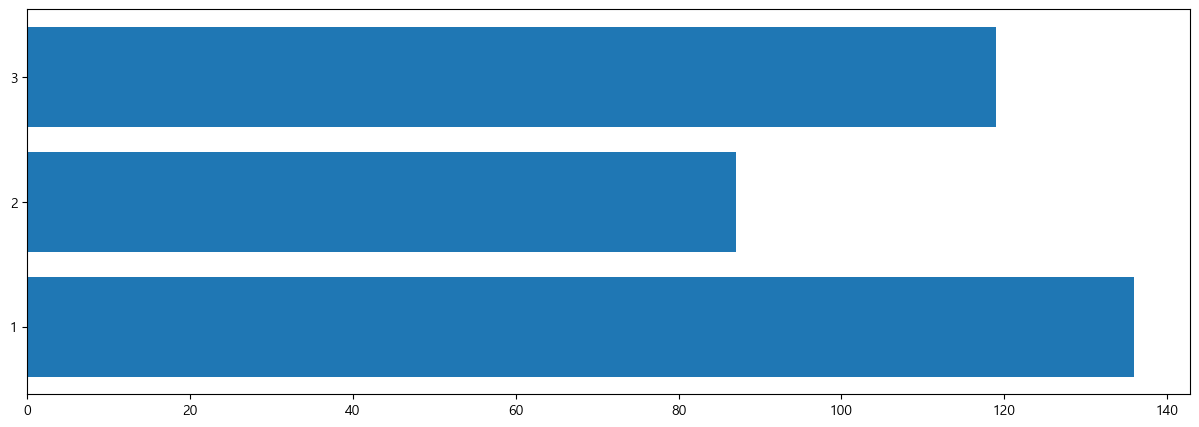

In [119]:
plt.figure(figsize = (15, 5))

plt.barh(titanicFrm.groupby('pclass')['survived'].sum().index , 
        titanicFrm.groupby('pclass')['survived'].sum().values)

plt.yticks(titanicFrm.groupby('pclass')['survived'].sum().index)
plt.show()
plt.close()

In [128]:
print('Q1) 서브셋 구축')
print('조건) 전입지역 - 충청남도, 경상북도, 강원, 전라남도')
print('조건) 2010 ~ 2017년도까지만 - ')
# seoulFrm.columns
subsetFrm = seoulFrm.loc[['충청남도', '경상북도', '강원도', '전라남도'] , '2010' : '2017' ]

Q1) 서브셋 구축
조건) 전입지역 - 충청남도, 경상북도, 강원, 전라남도
조건) 2010 ~ 2017년도까지만 - 


In [160]:
print('년도에 따른 전입지역의 인구 전입수를 bar 시각화 - ')
subsetFrm.T

년도에 따른 전입지역의 인구 전입수를 bar 시각화 - 


전입지,충청남도,경상북도,강원도,전라남도
2010,24522,16042,22736,16429
2011,24723,15818,23624,15974
2012,22269,15191,22332,14765
2013,21486,14420,20601,14187
2014,21473,14456,21173,14591
2015,22299,15113,22659,14598
2016,21741,14236,21590,13065
2017,21020,12464,21016,12426


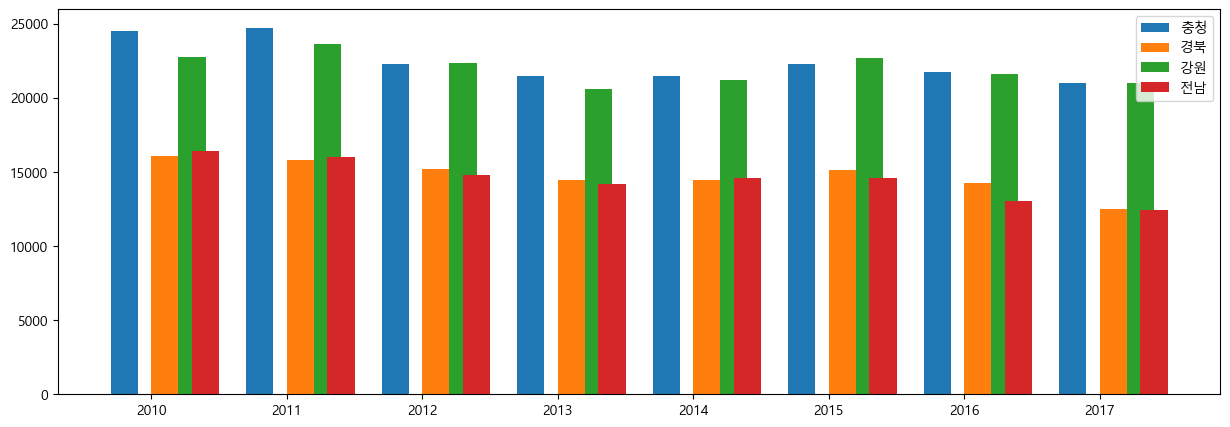

In [170]:
plt.figure(figsize = (15, 5))

plt.bar(x_axis-0.2 , subsetFrm.T['충청남도'] , width = 0.2 , label = '충청')
plt.bar(x_axis+0.1 , subsetFrm.T['경상북도'] , width = 0.2 , label = '경북')
plt.bar(x_axis+0.3 , subsetFrm.T['강원도'] ,   width = 0.2 , label = '강원')
plt.bar(x_axis+0.4 , subsetFrm.T['전라남도'] , width = 0.2 , label = '전남')

x_axis = np.arange(len(subsetFrm.T.index)) 
plt.xticks(x_axis , subsetFrm.T.index)

plt.legend(loc = 'best')
plt.show()
plt.close()

In [172]:
players = ['player01' , 'player02' , 'player03' , 'player04'] 
females = [5,8,4,7]
males   = [6,4,9,5]

x_axis = np.arange(len(players))
print('x_axis - ' , x_axis)

x_axis -  [0 1 2 3]


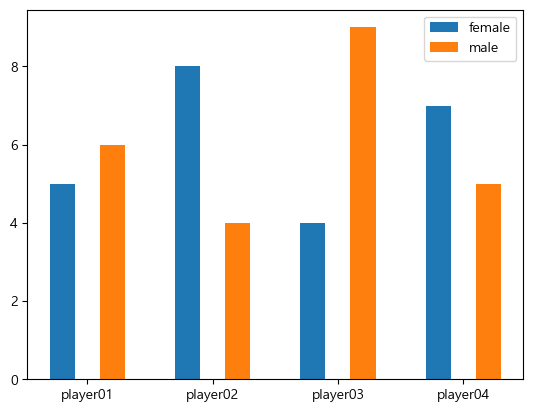

In [173]:
plt.figure() 

# multi bar
plt.bar(x_axis-0.2 , females , width = 0.2 , label = 'female')
plt.bar(x_axis+0.2 , males , width = 0.2   , label = 'male')


plt.xticks(x_axis , players)
plt.legend()
plt.show()
plt.close()

In [183]:
print('case02 - ')
t_subsetFrm = subsetFrm.T
t_subsetFrm

case02 - 


전입지,충청남도,경상북도,강원도,전라남도
2010,24522,16042,22736,16429
2011,24723,15818,23624,15974
2012,22269,15191,22332,14765
2013,21486,14420,20601,14187
2014,21473,14456,21173,14591
2015,22299,15113,22659,14598
2016,21741,14236,21590,13065
2017,21020,12464,21016,12426


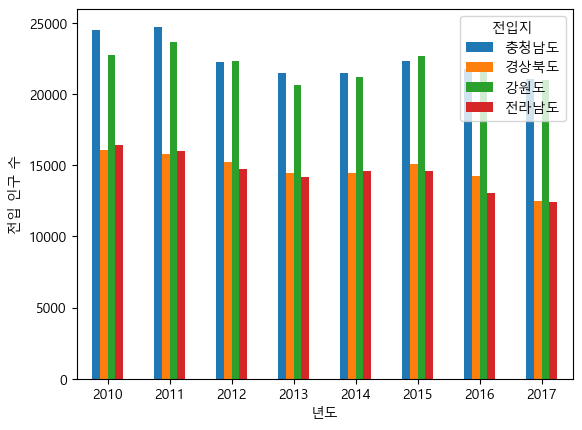

In [182]:
t_subsetFrm.plot(kind = 'bar')

plt.xlabel('년도')
plt.ylabel('전입 인구 수')

plt.xticks(rotation = 0)
plt.show()
plt.close()

In [191]:
print('기존 서브셋에 권역별 전입 인구 수 합계를 추가')
subsetFrm['합계'] = subsetFrm.sum(axis = 1)
subsetFrm

기존 서브셋에 권역별 전입 인구 수 합계를 추가


,2010,2011,2012,2013,2014,2015,2016,2017,합계
전입지,,,,,,,,,
충청남도,24522,24723,22269,21486,21473,22299,21741,21020,179533.0
경상북도,16042,15818,15191,14420,14456,15113,14236,12464,117740.0
강원도,22736,23624,22332,20601,21173,22659,21590,21016,175731.0
전라남도,16429,15974,14765,14187,14591,14598,13065,12426,116035.0


In [203]:
print('합계를 기준으로 내림차순정렬 - sort_values')
# subsetFrm.sort_values(by='합계', ascending = False)

sum_subsetFrm = subsetFrm[['합계']].sort_values(by='합계' , ascending = False)

합계를 기준으로 내림차순정렬 - sort_values


정렬된 결과를 수평막대그래프로 시각화 - 


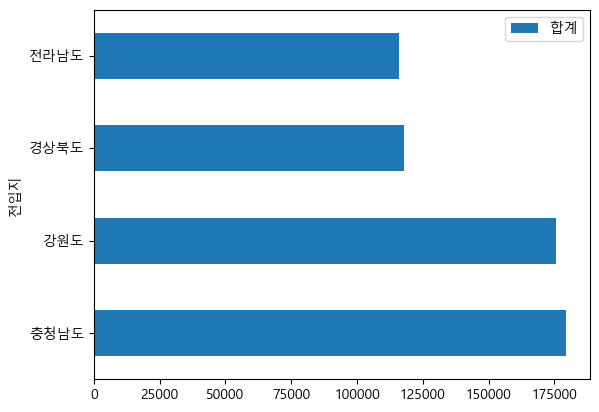

In [210]:
print('정렬된 결과를 수평막대그래프로 시각화 - ')
sum_subsetFrm.plot(kind = 'barh')

plt.show()
plt.close()

In [211]:
irisFrm = sns.load_dataset('iris')
irisFrm.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [216]:
print('bar chart 최종목표')
print(irisFrm.columns)
print('모든 피처명 변경 sepal_length -> 꽃받침길이')
print('피처명 변경 species      -> target') 

irisFrm.rename({'sepal_length' : '꽃받침길이' , 
                'sepal_width'  : '꽃받침너비' ,
                'petal_length' : '꽃잎길이' ,
                'petal_width'  : '꽃잎너비' ,
                'species'      : 'target'} , axis = 1 , inplace = True)
irisFrm

bar chart 최종목표
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
모든 피처명 변경 sepal_length -> 꽃받침길이
피처명 변경 species      -> target


,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [227]:
print('종(target)을 기준으로 그룹화 - groupby')
print('그룹에 대한 각 피처의 평균을 구한다')
mean_irisFrm = irisFrm.groupby('target').mean()
mean_irisFrm

종(target)을 기준으로 그룹화 - groupby
그룹에 대한 각 피처의 평균을 구한다


,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비
target,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


종별 평균을 막대그래프로 시각화 


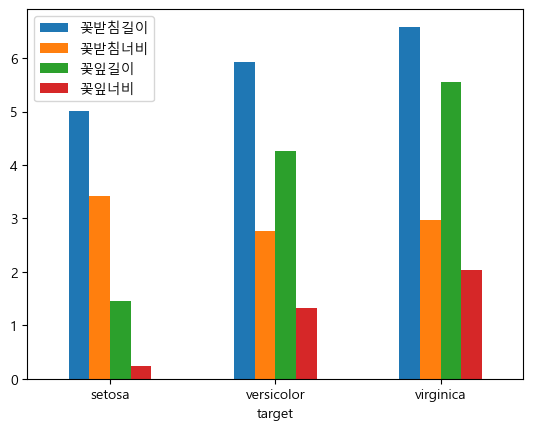

In [233]:
print('종별 평균을 막대그래프로 시각화 ')
mean_irisFrm.plot(kind = 'bar')

plt.legend(loc = 'best')
plt.xticks(rotation = 0)
plt.show()
plt.close()

<Axes: >

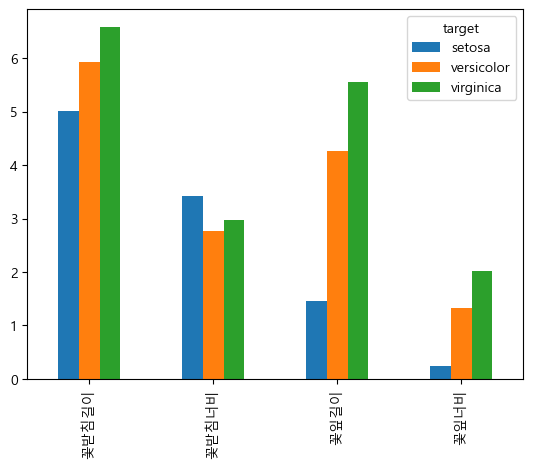

In [235]:
mean_irisFrm.T.plot(kind = 'bar')

In [243]:
print('area plot - ') 
subsetFrm.columns

area plot - 


Index(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '합계'], dtype='object')

In [252]:
print('컬럼 인덱스를 정수로 변경하라 - ') 
subsetFrm.drop('합계' , axis = 1 , inplace = True)

컬럼 인덱스를 정수로 변경하라 - 


In [261]:
subsetFrm.columns = subsetFrm.columns.values.astype('int')
subsetFrm.columns

Int64Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype='int64')

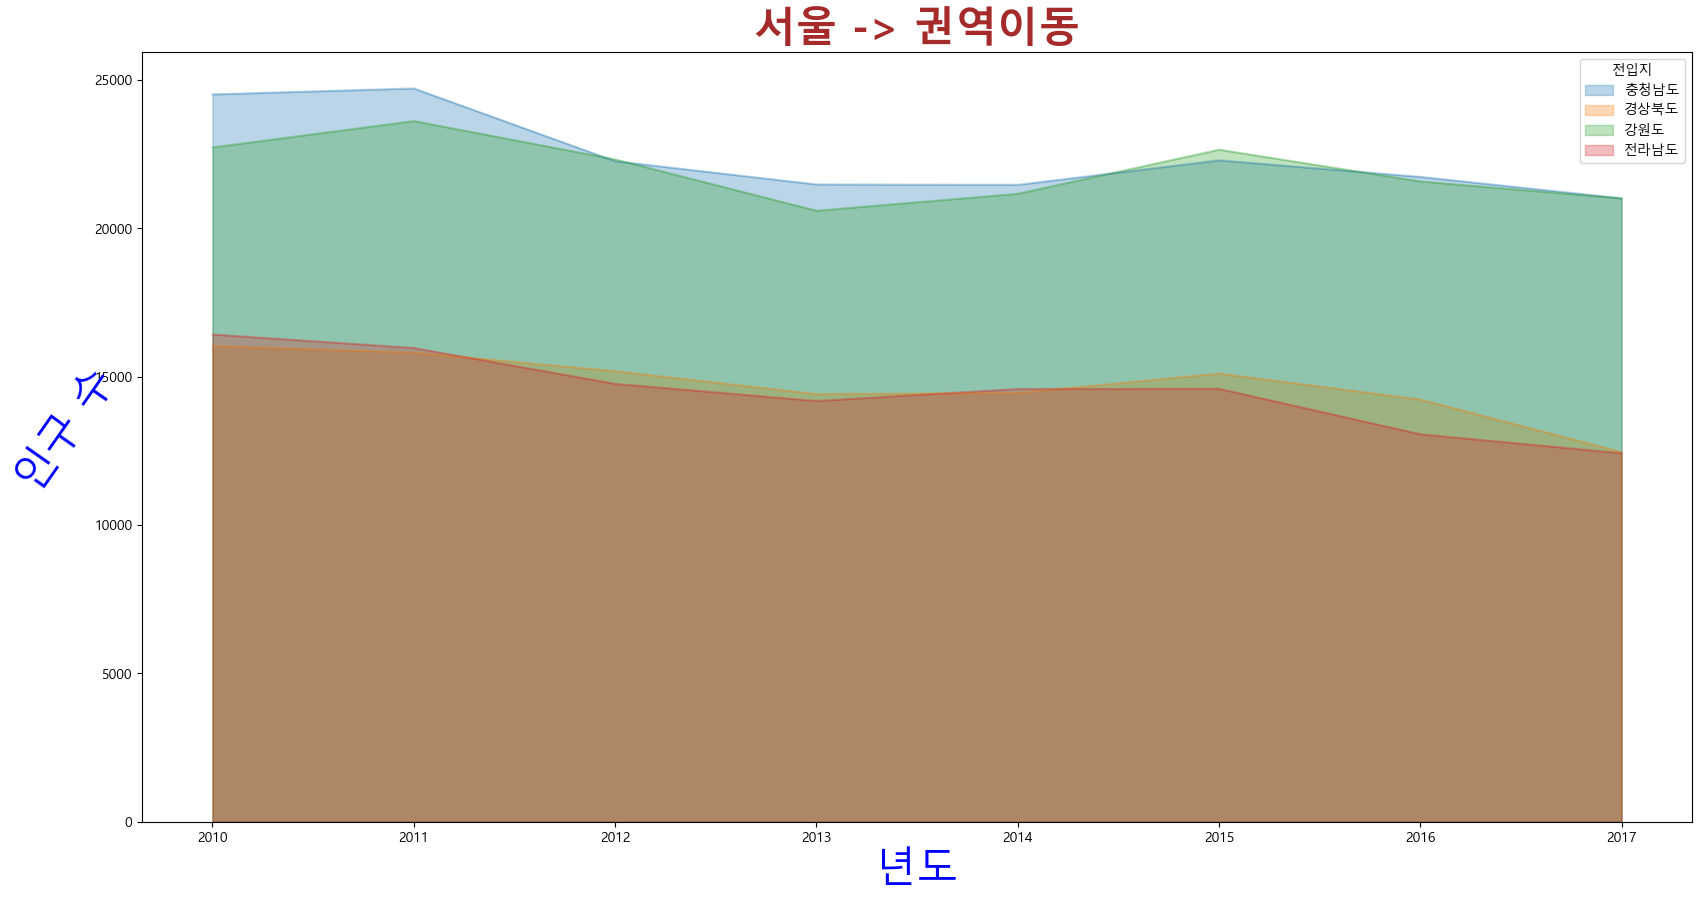

In [278]:
subsetFrm.T.plot(kind = 'area' , figsize=(20, 10) , alpha = 0.3 , stacked = False)

#option
plt.title('서울 -> 권역이동' , size = 30 , color = 'brown' , weight = 'bold')
plt.xlabel('년도' , color = 'blue' , size = 30 )
plt.ylabel('인구 수 ' , color = 'blue' , size = 30 , rotation = 55)

plt.show()
plt.close()

- mpg_visualization.xlsx

In [286]:
mpgFrm = pd.read_excel('./data/mpg_visualization.xlsx' , 
                       index_col = 0)
mpgFrm.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


산점도 - scatter plot


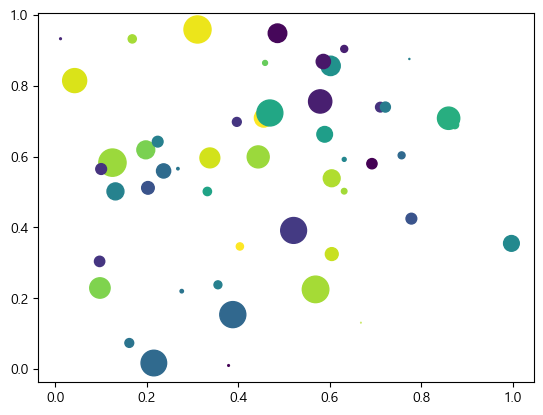

In [302]:
print('산점도 - scatter plot')
x = np.random.rand(50)
y = np.random.rand(50)

plt.figure()

area = (20 * np.random.rand(50)) **2 
# print(area)
colors = np.random.rand(50)
plt.scatter(x,y ,s= area, c = colors)

plt.show()
plt.close()
